# Exploratory Data Analysis

In [1]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F

In [2]:
spark = SparkSession.builder.master('local[1]').appName("Jupyter").getOrCreate()
sc = spark.sparkContext

In [3]:
#test if this works

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import scipy
import datetime

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# create sparksession

spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

# Load Data

In [5]:
#collisions = spark.read.csv('data/accidents.csv', header='true', inferSchema = True)
#collisions.show(2)

df_new = spark.read.csv('data/accidents_new.csv', header='true', inferSchema = True)

# Data Perspective
_____

* One variable
    * Numeric variables:
        * continuous
        * discrete
    * Categorical variables:
        * ordinal
        * nominal

* Multiple variables:
    * Numeric x Numeric
    * Categorical x Numeric
    * Categorical x Categorical
____________________

# Overview

In [6]:
print('The total number of rows : ', df_new.count(),
      '\nThe total number of columns :', len(df_new.columns))

The total number of rows :  128647 
The total number of columns : 40


# Data Schema
Print the data schema for our dataset - SAAQ Accident Information

In [7]:
df_new.printSchema()

root
 |-- ID: string (nullable = true)
 |-- DATE: timestamp (nullable = true)
 |-- WEEK_DAY: string (nullable = true)
 |-- REG: string (nullable = true)
 |-- MUNCP: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- TYPE_ACCDN: integer (nullable = true)
 |-- SURFACE: integer (nullable = true)
 |-- LIGHT: integer (nullable = true)
 |-- STR_ASPCT: integer (nullable = true)
 |-- STR_CONFIG: integer (nullable = true)
 |-- METEO: integer (nullable = true)
 |-- GRAVITE: string (nullable = true)
 |-- NB_VEH_IMPLIQUES_ACCDN: integer (nullable = true)
 |-- NB_VICTIMES_TOTAL: integer (nullable = true)
 |-- NB_MORTS: integer (nullable = true)
 |-- NB_BLESSES_GRAVES: integer (nullable = true)
 |-- NB_BLESS_LEGERS: integer (nullable = true)
 |-- NB_DECES_PIETON: integer (nullable = true)
 |-- NB_BLESSES_PIETON: integer (nullable = true)
 |-- NB_VICTIMES_PIETON: integer (nullable = true)
 |-- NB_DECES_MOTO: integer (nullable = true)
 |-- NB_BLESSES_MOTO: integer (nullable = true)
 |

In [8]:
# Create temporary table query with SQL

df_new.createOrReplaceTempView('AccidentData')
accidents_limit_10 = spark.sql(
'''
SELECT * FROM AccidentData
LIMIT 10
'''
).toPandas()

accidents_limit_10

,ID,DATE,WEEK_DAY,REG,MUNCP,STREET,TYPE_ACCDN,SURFACE,LIGHT,STR_ASPCT,STR_CONFIG,METEO,GRAVITE,NB_VEH_IMPLIQUES_ACCDN,NB_VICTIMES_TOTAL,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESS_LEGERS,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,NB_DECES_MOTO,NB_BLESSES_MOTO,NB_VICTIMES_MOTO,NB_DECES_VELO,NB_BLESSES_VELO,NB_VICTIMES_VELO,nb_automobile_camion_leger,nb_camionLourd_tractRoutier,nb_outil_equipement,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise
0,SPVM _ 2012 _ 1,2012-02-01,ME,Montréal(06),Kirkland,ST CHARLES,31,16,1,11,4,11,Dommages matériels inférieurs au seuil de rapp...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,SPVM _ 2012 _ 3,2012-06-28,JE,Montréal(06),Montréal,COTE VERTU,31,11,1,11,3,11,Dommages matériels inférieurs au seuil de rapp...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,SPVM _ 2012 _ 4,2012-07-11,ME,Montréal(06),Montréal,ST MATHIEU,31,11,3,11,2,11,Dommages matériels inférieurs au seuil de rapp...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,SPVM _ 2012 _ 7,2012-01-03,MA,Montréal(06),Montréal,GOUIN O,31,11,1,11,2,11,Dommages matériels seulement,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
4,SPVM _ 2012 _ 12,2012-01-05,JE,Montréal(06),Montréal,GOUIN O,31,11,3,11,3,11,Dommages matériels inférieurs au seuil de rapp...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
5,SPVM _ 2012 _ 13,2012-01-05,JE,Montréal(06),Montréal,PIERREFONDS,31,16,3,11,9,17,Dommages matériels inférieurs au seuil de rapp...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
6,SPVM _ 2012 _ 14,2012-01-07,SA,Montréal(06),Dollard-Des Ormeaux,DES SOURCES,31,18,1,11,2,11,Dommages matériels inférieurs au seuil de rapp...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
7,SPVM _ 2012 _ 17,2012-01-09,LU,Montréal(06),Montréal,DE SAVOIE,31,11,1,11,2,12,Dommages matériels inférieurs au seuil de rapp...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8,SPVM _ 2012 _ 19,2012-01-11,ME,Montréal(06),Montréal,POMINVILLE,31,12,1,11,2,12,Dommages matériels inférieurs au seuil de rapp...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
9,SPVM _ 2012 _ 20,2012-01-12,JE,Montréal(06),Montréal,BD GOUIN,31,16,2,21,3,18,Léger,4,1,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0


# One Variable
__________

## a. Numeric - Data Totals
Totals for various accident records

In [9]:
from pyspark.sql import functions as func

#df_new.agg(func.sum("NB_BLESSES_VELO").alias('Velo'),func.sum("NB_VICTIMES_MOTO"),func.sum("NB_VEH_IMPLIQUES_ACCDN")).show()

df_new.agg(func.sum("NB_VEH_IMPLIQUES_ACCDN").alias('Ttl Cars In Accidents')).show()
df_new.agg(func.sum("NB_VICTIMES_TOTAL").alias('Ttl Victims')).show()
df_new.agg(func.sum("NB_MORTS").alias('Ttl Deaths')).show()
df_new.agg(func.sum("NB_BLESSES_GRAVES").alias('Ttl Severe Injuries')).show()
df_new.agg(func.sum("NB_BLESS_LEGERS").alias('Ttl Light Injuries')).show()
df_new.agg(func.sum("NB_DECES_PIETON").alias('Ttl Pedestrian Deaths')).show()
df_new.agg(func.sum("NB_BLESSES_PIETON").alias('Ttl Pedestrian Injuries')).show()
df_new.agg(func.sum("NB_VICTIMES_PIETON").alias('Ttl Pedestrian Victims')).show()
df_new.agg(func.sum("NB_DECES_MOTO").alias('Ttl Moto Deaths')).show()
df_new.agg(func.sum("NB_BLESSES_MOTO").alias('Ttl Moto Injuries')).show()
df_new.agg(func.sum("NB_VICTIMES_MOTO").alias('Ttl Moto Victims')).show()
df_new.agg(func.sum("NB_DECES_VELO").alias('Ttl Bike Deaths')).show()
df_new.agg(func.sum("NB_BLESSES_VELO").alias('Ttl Bike Injuries')).show()
df_new.agg(func.sum("NB_VICTIMES_VELO").alias('Ttl Bike Victims')).show()
df_new.agg(func.sum("nb_automobile_camion_leger").alias('Ttl Car - Light Trucks')).show()
df_new.agg(func.sum("nb_camionLourd_tractRoutier").alias('Ttl Heavy Truck - Tractor')).show()
df_new.agg(func.sum("nb_outil_equipement").alias('Ttl Equipment - Tools')).show()
df_new.agg(func.sum("nb_tous_autobus_minibus").alias('Ttl Bus')).show()
df_new.agg(func.sum("nb_bicyclette").alias('Ttl Bikes')).show()
df_new.agg(func.sum("nb_cyclomoteur").alias('Ttl Motorized Bike')).show()
df_new.agg(func.sum("nb_motocyclette").alias('Ttl Motorcycle')).show()
df_new.agg(func.sum("nb_taxi").alias('Ttl Taxi')).show()
df_new.agg(func.sum("nb_urgence").alias('Ttl Emergency')).show()
df_new.agg(func.sum("nb_motoneige").alias('Ttl Snowmobile')).show()
df_new.agg(func.sum("nb_VHR").alias('Ttl Motorhome')).show()
df_new.agg(func.sum("nb_autres_types").alias('Ttl Other Types')).show()
df_new.agg(func.sum("nb_veh_non_precise").alias('Ttl Non Specified Vehicles')).show()

+---------------------+
|Ttl Cars In Accidents|
+---------------------+
|               251681|
+---------------------+

+-----------+
|Ttl Victims|
+-----------+
|      39532|
+-----------+

+----------+
|Ttl Deaths|
+----------+
|       170|
+----------+

+-------------------+
|Ttl Severe Injuries|
+-------------------+
|               1339|
+-------------------+

+------------------+
|Ttl Light Injuries|
+------------------+
|             38023|
+------------------+

+---------------------+
|Ttl Pedestrian Deaths|
+---------------------+
|                   97|
+---------------------+

+-----------------------+
|Ttl Pedestrian Injuries|
+-----------------------+
|                   7255|
+-----------------------+

+----------------------+
|Ttl Pedestrian Victims|
+----------------------+
|                  7352|
+----------------------+

+---------------+
|Ttl Moto Deaths|
+---------------+
|             11|
+---------------+

+-----------------+
|Ttl Moto Injuries|
+---------------

In [10]:
df_totals = pd.DataFrame(columns=['Attr','Total'])

#df_totals.append({'Attr':'NB_VEH_IMPLIQUES_ACCDN','Total':df_new.agg(func.sum("NB_VEH_IMPLIQUES_ACCDN"))},ignore_index=True)
#df_totals

,Attr,Total


## b. Categorical

### GRAVITE - severity of the accident

In [11]:
gravite_levels = spark.sql(
'''
SELECT GRAVITE, COUNT(*) as Total FROM AccidentData
GROUP BY GRAVITE
ORDER BY Total DESC
'''
).toPandas()

gravite_levels

,GRAVITE,Total
0,Dommages matériels seulement,49084
1,Dommages matériels inférieurs au seuil de rapp...,47626
2,Léger,30533
3,Grave,1239
4,Mortel,165


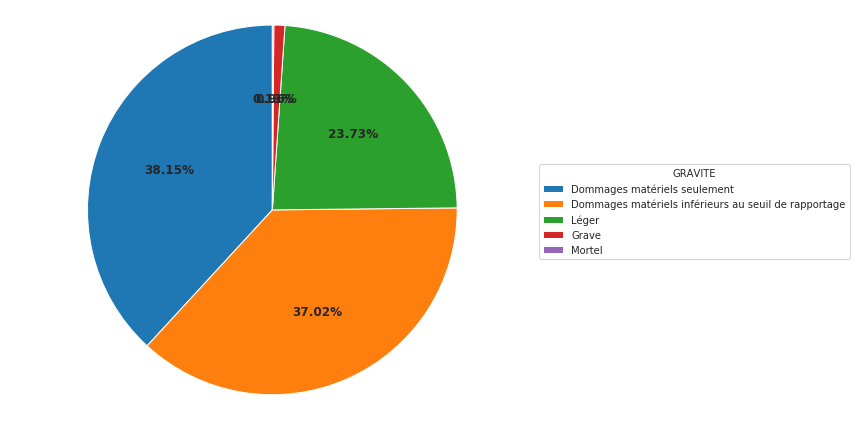

In [12]:
# Pie Chart

fig,ax = plt.subplots(1,1,figsize=(12,6))

wedges, texts, autotexts = ax.pie(gravite_levels['Total'], radius=2, #labeldistance=2, pctdistance=1.1,
                                  autopct='%1.2f%%', startangle=90)


ax.legend(wedges, gravite_levels['GRAVITE'],
          title="GRAVITE",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
ax.axis('equal')  
plt.tight_layout()

plt.savefig('figures/gravite_levels.png')
plt.show()

### METEO - Weather Conditions

In [13]:
meteo_conditions = spark.sql(
'''
SELECT METEO, COUNT(*) as Total FROM AccidentData
GROUP BY METEO
ORDER BY Total DESC
'''
).toPandas()

meteo_conditions['METEO'] = meteo_conditions['METEO'].replace( {11:'Clear',12:'Overcast: cloudy/dark',13:'Fog/mist',
                                                                14:'Rain/bruine',15:'Heavy rain',16:'Strong wind',
                                                                17:'Snow/storm',18:'Blowing snow/blizzard',
                                                                19:'Ice',99:'Other..'})

meteo_conditions

,METEO,Total
0,Clear,88784
1,Overcast: cloudy/dark,19247
2,Rain/bruine,10051
3,Snow/storm,7510
4,Blowing snow/blizzard,929
5,Heavy rain,740
6,Other..,504
7,Ice,420
8,Strong wind,246
9,Fog/mist,216


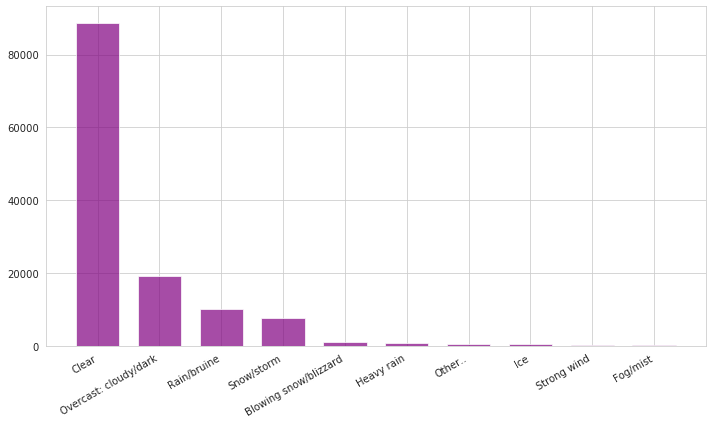

In [14]:
fig,ax = plt.subplots(1,1,figsize=(10,6))

plt.bar(meteo_conditions['METEO'], meteo_conditions['Total'],
        align='center', alpha=0.7, width=0.7, color='purple')

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()

plt.savefig('figures/meteo_conditions.png')
plt.show()

# Multiple Variables
____________
## Numeric X Categorical

### 1. Accident Victims by Municipality

In [15]:
victims_by_municipality = spark.sql(
'''
SELECT MUNCP, SUM(NB_VICTIMES_TOTAL) as Total FROM AccidentData
GROUP BY MUNCP
ORDER BY Total DESC

'''
).toPandas()

victims_by_municipality

,MUNCP,Total
0,Montréal,36307
1,Pointe-Claire,616
2,Dollard-Des Ormeaux,566
3,Mont-Royal,442
4,Dorval,425
5,Westmount,274
6,Côte-Saint-Luc,237
7,Kirkland,184
8,Beaconsfield,126
9,Montréal-Est,122


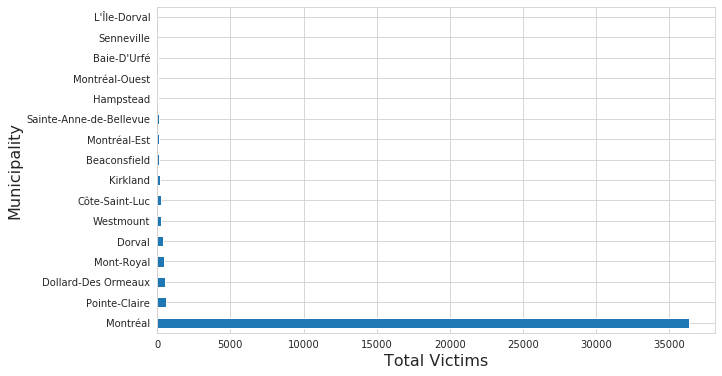

In [25]:
fig,ax = plt.subplots(1,1,figsize=(10,6))

victims_by_municipality.plot(x = 'MUNCP', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)

ax.set_xlabel('Total Victims', size = 16)
ax.set_ylabel('Municipality', size = 16)

plt.savefig('figures/victims_by_municipality.png')
plt.show()

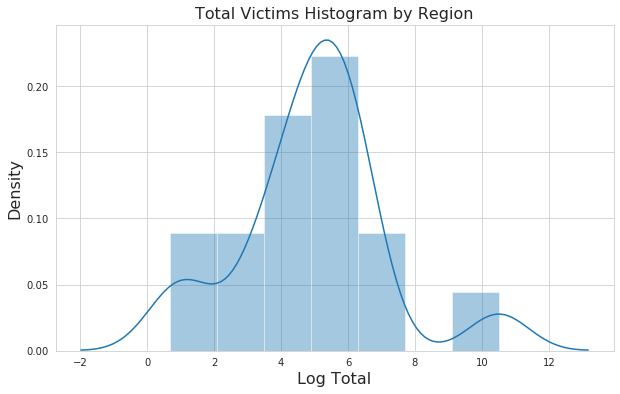

In [17]:

victims_by_region = spark.sql(
'''
SELECT MUNCP, SUM(NB_VICTIMES_TOTAL) as Total FROM AccidentData
GROUP BY MUNCP

'''
).toPandas()

plt.figure(figsize = (10,6))
sns.distplot(np.log(victims_by_region['Total']))

plt.title('Total Victims Histogram by Region', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)

plt.savefig('figures/distplot.png')
plt.show()

### 2. Total Collisions by Day of Week

In [18]:
collisions_by_day = spark.sql(
'''
SELECT WEEK_DAY, COUNT(WEEK_DAY) as Number_of_Collisions FROM AccidentData
GROUP BY WEEK_DAY
ORDER BY Number_of_Collisions DESC

'''
).toPandas()

collisions_by_day

,WEEK_DAY,Number_of_Collisions
0,VE,20965
1,JE,20618
2,ME,19468
3,MA,19195
4,LU,17810
5,SA,16633
6,DI,13958


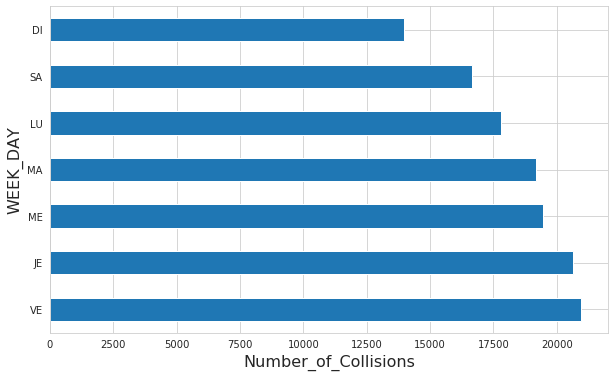

In [19]:
fig,ax = plt.subplots(1,1,figsize=(10,6))

collisions_by_day.plot(x = 'WEEK_DAY', y = 'Number_of_Collisions', kind = 'barh', color = 'C0', ax = ax, legend = False)

ax.set_xlabel('Number_of_Collisions', size = 16)
ax.set_ylabel('WEEK_DAY', size = 16)

plt.savefig('figures/collisions_by_day.png')
plt.show()

#### "VE", Friday has the highest number of collisions.

### 3. Top 10 Accidents by street

In [20]:
accidents_by_street = spark.sql(
'''
SELECT STREET, COUNT(STREET) as Number_of_Accidents FROM AccidentData
GROUP BY STREET
ORDER BY Number_of_Accidents DESC
LIMIT 10
'''
).toPandas()

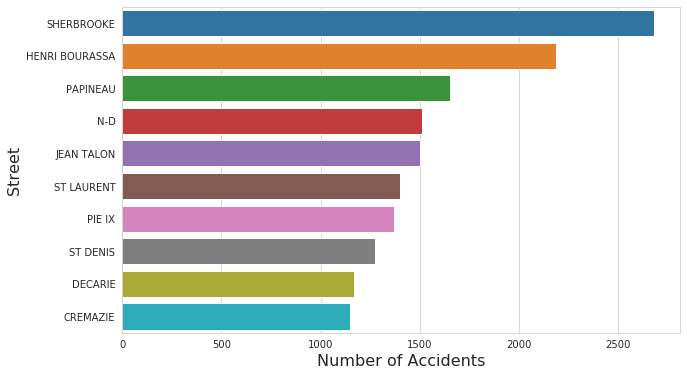

In [21]:
fig,ax = plt.subplots(1,1,figsize=(10,6))

#accidents_by_street.plot(x = 'STREET', y = 'Number_of_Accidents', kind = 'barh', color = 'C0', ax = ax, legend = False)
sns.barplot(x=accidents_by_street['Number_of_Accidents'], y=accidents_by_street['STREET'], orient='h')

ax.set_xlabel('Number of Accidents', size = 16)
ax.set_ylabel('Street', size = 16)

plt.savefig('figures/accidents_by_street.png')
plt.show()

## Numeric X Numeric

### Correlation Heatmap
Illustrates the corellation between numeric variables of the dataset.

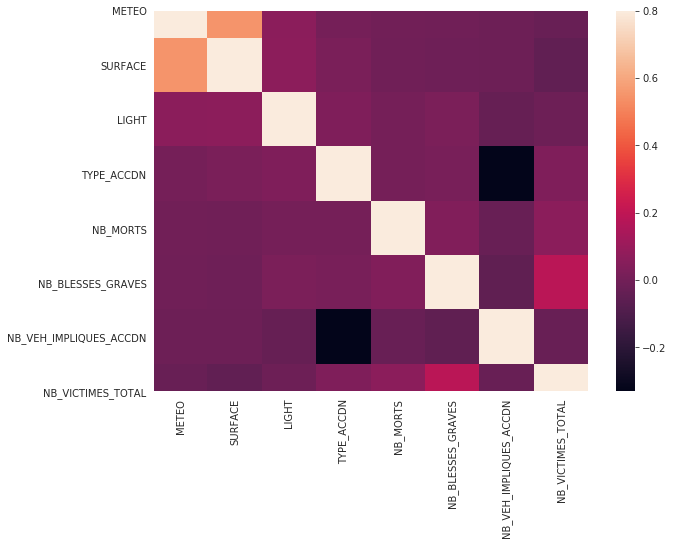

In [22]:
plot_df = spark.sql(
'''
SELECT METEO, SURFACE, LIGHT, TYPE_ACCDN, 
NB_MORTS, NB_BLESSES_GRAVES, NB_VEH_IMPLIQUES_ACCDN, NB_VICTIMES_TOTAL
FROM AccidentData

'''
).toPandas()


corrmat = plot_df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.savefig('figures/heatmap.png')
plt.show()


## Categorical X Categorical